In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
#欧式距离
def get_distance(x_1, x_2):
    return np.sqrt(np.sum(np.square(x_1 - x_2)))

In [3]:
#初始化中心点
def center_init(k, dataset):
    m, n = dataset.shape
    centers = np.zeros((k, n))
    #随机选择k个中心点
    selected_center_index = []
    for i in range(k):
        #不能选到相同的点
        index = random.choice(list(set(range(m))-set(selected_center_index)))
        centers[i] = dataset[index]
        selected_center_index.append(index)
    return centers

In [4]:
#分类，寻找和样本点最近的中心点
def closest_center(sample, centers):
    closest_i = 0
    closest_dist = float('inf')
    for i, c in enumerate(centers):
        distance = get_distance(sample, c)
        if distance < closest_dist:
            closest_i = i
            closest_dist = distance
    return closest_i

In [5]:
#聚类
def create_clusters(centers, k, dataset):
    #分为k个类，用来装每个类别对应样本的索引
    clusters = [[] for i in range(k)]
    #遍历样本计算每个样本点离哪个类别比较近
    for row, sample in enumerate(dataset):
        #加入列表中
        center_i = closest_center(sample, centers)
        clusters[center_i].append(row)
    return clusters

In [6]:
#重新计算样本中心
def calculate_new_centers(clusters, k, dataset):
    m, n = dataset.shape
    centers = np.zeros((k, n))
    #找出所有样本点的中心点，令此称为新的中心点
    for index, cluster in enumerate(clusters):
        new_center = np.mean(dataset[cluster], axis = 0)
        centers[index] = new_center
    return centers

In [7]:
#最终的分类，格式相当于load_iris的target
def get_cluster_label(clusters, dataset):
    y_pred = np.zeros((np.shape(dataset)[0]))
    for index, cluster in enumerate(clusters):
        for i in cluster:
            y_pred[i] = index
    return y_pred

In [50]:
def k_means(dataset, k, max_iter):
    centers = center_init(k, dataset)
    for i in range(max_iter):
        clusters = create_clusters(centers, k, dataset)
        pre_centers = centers
        new_centers = calculate_new_centers(clusters, k, dataset)
        diff = new_centers - pre_centers
        if diff.sum() == 0:
            break
    return get_cluster_label(clusters, dataset)

In [9]:
data = pd.read_csv('points.txt', header = None)

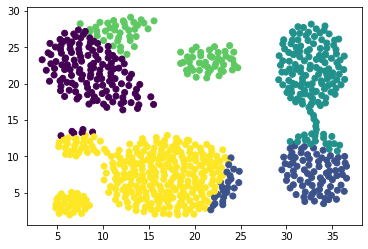

In [56]:
import matplotlib.pyplot as plt
results = k_means(data.values, 5, 500)
plt.scatter(data.values[:,0], data.values[:,1], c = results)
plt.show()

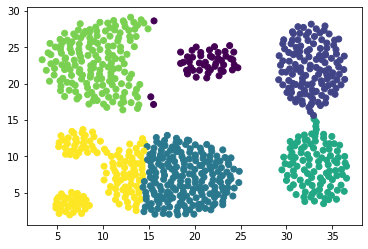

In [55]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6).fit_predict(data)
plt.scatter(data.values[:,0], data.values[:,1], c = kmeans)
plt.show()